In [1]:
import time
import pickle
import scipy

import pandas as pd
import numpy as np

from pprint import pprint 
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

%matplotlib inline

In [2]:
r_state = 8 #42
basedir = "./pkls/"

In [3]:
def pickle_stuff(filename, data):
    ''' save file '''
    with open(filename, 'w') as picklefile:
        pickle.dump(data, picklefile)

def unpickle(filename):
    ''' open file '''
    with open(filename, 'r') as picklefile:
        old_data = pickle.load(picklefile)
    return old_data

In [4]:
feature_df = unpickle(basedir+"zscore_df.pkl")
print feature_df.head()

             track_id  duration   fade_in     tempo  energy  danceability  \
0  TRBGPHG12903CE6CC3 -0.668187 -0.319412 -0.194199       0             0   
1  TRBGPYK128F42796E1  0.926188  4.084562  0.881785       0             0   
2  TRBGPJP128E078ED20  0.701886 -0.252490  3.120673       0             0   
3  TRBGPXH128F428C912 -0.088664 -0.236965 -0.668922       0             0   
4  TRBGPSV12903CA9C25  0.114352 -0.019068  1.451242       0             0   

   loudness  mode  key_0  key_1      ...        timbre_mode3  timbre_mode4  \
0 -1.007373     1      0      0      ...            1.259628      1.189218   
1  0.092725     1      0      0      ...            0.536204      0.386584   
2  1.121520     0      0      0      ...            1.117500      0.398900   
3 -1.041080     1      0      0      ...           -2.393088     -3.230586   
4  0.868905     1      0      0      ...           -0.075974      0.887092   

   timbre_mode5  timbre_mode6  timbre_mode7  timbre_mode8  timbre_mo

In [5]:
features = feature_df.iloc[:,1:]
print features.head()

   duration   fade_in     tempo  energy  danceability  loudness  mode  key_0  \
0 -0.668187 -0.319412 -0.194199       0             0 -1.007373     1      0   
1  0.926188  4.084562  0.881785       0             0  0.092725     1      0   
2  0.701886 -0.252490  3.120673       0             0  1.121520     0      0   
3 -0.088664 -0.236965 -0.668922       0             0 -1.041080     1      0   
4  0.114352 -0.019068  1.451242       0             0  0.868905     1      0   

   key_1  key_2      ...        timbre_mode3  timbre_mode4  timbre_mode5  \
0      0      0      ...            1.259628      1.189218      0.437165   
1      0      0      ...            0.536204      0.386584      0.661103   
2      0      0      ...            1.117500      0.398900      0.223770   
3      0      0      ...           -2.393088     -3.230586     -0.341594   
4      0      0      ...           -0.075974      0.887092     -0.361331   

   timbre_mode6  timbre_mode7  timbre_mode8  timbre_mode9  tim

In [6]:
fks = [2]+range(10,160, 10)
f_inertias = []
for k in fks:
    t1 = time.time()
    print k,
    model = KMeans(n_clusters=k, n_jobs=6, random_state=r_state) #init='k-means++', max_iter=100,
    model.fit(features)
    f_inertias.append(model.inertia_)
    t2 = time.time()
    print t2-t1, 

2 0.37687587738 10 6.19266486168 20 11.0047001839 30 14.9057910442 40 19.6181151867 50 22.0260128975 60 24.0450468063 70 25.439029932 80 28.3493919373 90 33.0434148312 100 35.1410489082 110 36.8790490627 120 40.0642569065 130 38.5687990189 140 42.3827669621 150 40.6767399311


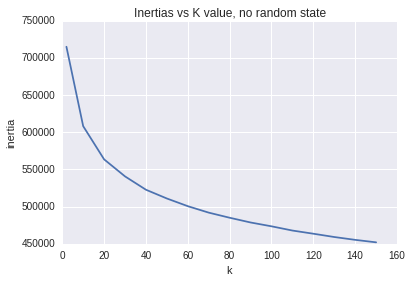

In [7]:
ax = plt.subplot(111)
plt.plot(fks, f_inertias)
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Inertias vs K value, no random state")
plt.show()

In [8]:
def see_kmeans_args(X, model):
    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = list(X)
    #terms = raw_features
    #terms = rf_counts
    #print order_centroids
    for i in range(len(model.cluster_centers_)):
        print "Cluster %d:" % i,
        for ind in order_centroids[i, :10]:
            #print terms[0][ind][0], 
            #f_ind = features.index(ind)
            print terms[ind],
            #print ' %s' % terms
        print

def run_k_means(X, k):
    model = KMeans(n_clusters=k, n_jobs=6, random_state=r_state)#max_iter=100,  #init='k-means++'
    model.fit(X)
    see_kmeans_args(X, model)
    return model

In [9]:
k2 = 40
feature_model = run_k_means(features, k2)

Top terms per cluster:
Cluster 0: timbre_median6 timbre_mean6 time_sig_4 timbre_median7 timbre_mean7 mode timbre_mean10 timbre_median10 timbre_mean2 pitch_median2
Cluster 1: pitch_median8 pitch_mean8 mode time_sig_4 pitch_mean3 key_7 pitch_median3 pitch_mode8 pitch_mode3 pitch_median7
Cluster 2: timbre_median4 timbre_mean4 pitch_median1 pitch_mean1 timbre_median10 timbre_mean10 pitch_median2 pitch_mean2 timbre_mean7 timbre_mean6
Cluster 3: timbre_median3 timbre_mean3 timbre_mean5 timbre_median5 mode timbre_median11 timbre_mode3 timbre_mode5 timbre_mean11 fade_in
Cluster 4: timbre_median6 timbre_mean6 mode timbre_mode6 timbre_median12 timbre_mean12 time_sig_4 timbre_mean9 timbre_median9 pitch_mode11
Cluster 5: timbre_median11 timbre_mean12 timbre_median12 timbre_mean11 mode timbre_median3 timbre_mean3 timbre_mean5 timbre_median5 time_sig_4
Cluster 6: timbre_mean5 timbre_median5 timbre_mean8 timbre_median8 timbre_median11 mode timbre_mean11 timbre_median3 time_sig_4 timbre_mean3
Cluster 

In [10]:
cluster_numbers_f = feature_model.predict(features)
print cluster_numbers_f[:10]

[14  1  8 31 34 16  0 22  1 10]


In [11]:
f_centroids = feature_model.cluster_centers_
print f_centroids.shape

(40, 100)


In [12]:
c_labels_f = range(f_centroids.shape[0])
clusters_dict_f = {el:[] for el in c_labels_f}

for i, cna in enumerate(cluster_numbers_f):
    clusters_dict_f[cna].append(i)

#print clusters_dict_f[len(c_labels_f)-1]
print len(clusters_dict_f[0])
print len(clusters_dict_f[1])

352
160


In [13]:
#print feature_df.iloc[200]

In [14]:
mins = []
for lab, inds in clusters_dict_f.iteritems():
    xs = []
    print lab,
    
    #ten closest tracks
    mindists = [(9999999,9999,9999, len(inds)) for t in range(10)]
    for ind in inds:
        #nodes.append({"index": ind, "cluster": lab, "author": topics_authors[ind][1], \
        #              "topic": labels[authors[ind]-1][1]})
        #print ind
        xs.append(features.iloc[ind])
        
        dist = scipy.spatial.distance.euclidean(features.iloc[ind], f_centroids[lab])
        if dist < mindists[-1][0]:
            for i, m in reversed(list(enumerate(mindists))):
                if i > 0:
                    mindists[i] = mindists[i-1]
            mindists[0] = (dist, lab, ind, len(inds))
            mindists = sorted(mindists)
    mins.append(mindists)
#print
#print mins

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39


In [15]:
for m in mins:
    print "cluster:", m[0][1]
    for t in m:
        #print sorted(rf_counts[m[2]], key=lambda x:(-x[1],x[0]))[:20]
        pprint(feature_df.iloc[t[2]]["track_id"])
    print m[0][3], "total songs" 

cluster: 0
'TRAQBNL128F4254D13'
'TRALEEZ128F429508A'
'TRAXQUZ128F42B77BE'
'TRAOZSQ12903CE29D0'
'TRBBVYO128F146AEDC'
'TRBDOEI128F9329AE5'
'TRAFEOY128F4259E97'
'TRACPNW128F92F8C8E'
'TRASPQA128F4273D22'
'TRBGPZX128F4285105'
352 total songs
cluster: 1
'TRATWUD128F9309671'
'TRABZRZ128F42628AD'
'TRALLQX12903CD838C'
'TRAADOF12903CAA1C1'
'TRBEFFA128F930F017'
'TRAKDWD128F92E25D5'
'TRBHRLC128F14AE627'
'TRADJSM128F14894AA'
'TRATQQQ128F93084BE'
'TRBDMZP128F93499E4'
160 total songs
cluster: 2
'TRAYHUS128F9348A7A'
'TRATHGH12903C9D01B'
'TRBEMDL128F424ABD6'
'TRADMGC128F9306CC9'
'TRBBADO12903CEE832'
'TRAFVME128F4269F32'
'TRAHYHQ12903C9D013'
'TRAAQFC128F425ED83'
'TRAZDEN128F4276BA9'
'TRAYTOM128F422B08C'
118 total songs
cluster: 3
'TRACCXJ128F428F0CF'
'TRBEEQG128F42732AB'
'TRAMCDJ128F42830EC'
'TRAJNFU128F4263469'
'TRABBOR128F4286200'
'TRAIHTK128F4291340'
'TRBIGFQ128F933EBEE'
'TRAJLGV128F4232684'
'TRAUTJP128F4291366'
'TRAIJVF128F9309AF9'
192 total songs
cluster: 4
'TRAUVNN128F423068C'
'TRBGUUE128F1494FB6'

##Clusters and closest track
```
non r_state model
cluster: 0
'TRADSBC128F429E4A4'
208 total songs
cluster: 1
'TRAYHUS128F9348A7A'
116 total songs
cluster: 2
'TRAGOVH128F42480F5'
544 total songs
cluster: 3
'TRAXJGB128F93476D7'
376 total songs
cluster: 4
'TRBDGQU128F146607A'
298 total songs
cluster: 5
'TRBDYAC128F4249498'
283 total songs
cluster: 6
'TRBHDSW128F42ABC12'
45 total songs
cluster: 7
'TRADSQX128F14B0418'
104 total songs
cluster: 8
'TRAHOOP128F42B62AB'
208 total songs
cluster: 9
'TRAEKCR128F14593A5'
263 total songs
cluster: 10
'TRAMCUA128F4238312'
110 total songs
cluster: 11
'TRAZNLT128F4264189'
87 total songs
cluster: 12
'TRACSXC12903CF9525'
393 total songs
cluster: 13
'TRAOWVD128F930C0D1'
230 total songs
cluster: 14
'TRATIGJ128F423B3A0'
150 total songs
cluster: 15
'TRBFQZS12903CC9965'
191 total songs
cluster: 16
'TRAXNOE128F149158A'
299 total songs
cluster: 17
'TRAUGLZ128F14AE500'
101 total songs
cluster: 18
'TRBBVYO128F146AEDC'
435 total songs
cluster: 19
'TRBFUNY128C7196B7D'
151 total songs
cluster: 20
'TRBECBM128F426AA34'
198 total songs
cluster: 21
'TRABAIO128F42938F9'
562 total songs
cluster: 22
'TRAPWSV128F4294DF4'
123 total songs
cluster: 23
'TRBEEQG128F42732AB'
189 total songs
cluster: 24
'TRAGOMV128F4274745'
246 total songs
cluster: 25
'TRANMKA128F426C3B0'
210 total songs
cluster: 26
'TRARSJD128F932BAF8'
583 total songs
cluster: 27
'TRAXKLH128F4289138'
347 total songs
cluster: 28
'TRBDQLL128E078B757'
296 total songs
cluster: 29
'TRBFWVA128F42265AD'
490 total songs
cluster: 30
'TRANXZM128F92D58DF'
210 total songs
cluster: 31
'TRAFNWS128F931A45D'
59 total songs
cluster: 32
'TRBFZRA128F427030C'
379 total songs
cluster: 33
'TRAUHZI12903CF91BE'
103 total songs
cluster: 34
'TRAWISL128F422B153'
161 total songs
cluster: 35
'TRAVXZP128F425C677'
55 total songs
cluster: 36
'TRBFJMR128F930B3A6'
559 total songs
cluster: 37
'TRBHRLC128F14AE627'
187 total songs
cluster: 38
'TRBFEGL128F9318DF4'
279 total songs
cluster: 39
'TRALZBP128F4263E1A'
172 total songs
```

In [16]:
pickle_stuff(basedir+"kmeans40_"+str(r_state)+".pkl", feature_model)

In [20]:
with open(basedir+"trackspercluster_"+str(r_state)+".txt", 'w') as tf:
    for m in mins:
        tf.write(str(m[0][3])+"\n")

In [23]:
with open(basedir+"toptracks_"+str(r_state)+".txt", 'w') as ttf:
    for m in mins:
        for t in m:
            ttf.write(feature_df.iloc[t[2]]["track_id"] + " ")
        ttf.write("\n")
        